<a href="https://colab.research.google.com/github/lingchm/datascience/blob/master/exercises/signal_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Denoising

**Problem**

Given a noisy 1D signal, denoise the signal into a clean signal.

**Method**

We formulate the following optimization problem and solve using Arrow-Hurwics primal-dual algorithm.

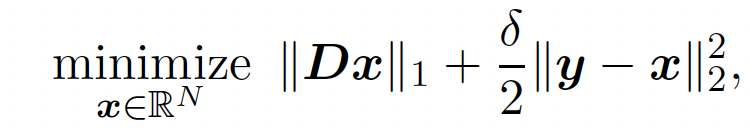


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [ ]:
# read in data
data = scipy.io.loadmat('noisy_signal')
D = data['D']
N = data['N']
y = data['y']

In [ ]:
# visualize
plt.plot(y)
plt.title("Noisy signal")
plt.show()

In [ ]:
# implement AH primal-dual algorithm
def prox_infn(z):
    x = z * 1
    for i in range(z.shape[0]):
        if z[i] > 1:
            x[i] = 1
        elif z[i] < -1:
            x[i] = -1
    return x
    
def prox_g(z, delta, alpha, y, D):
    return (1 / (delta + 1 / alpha)) * (delta * y + z / alpha)
    
def AH_primal_dual(D, N, y, delta=1, sigma=0.1, alpha=0.1, max_iter=1000, tol=1e-3):
    k, xk, xk_, vk = 0, y*1, y*0, 0
    while k < max_iter:
        xk_ = xk * 1
        vk = prox_infn(vk + sigma * D @ xk)
        xk = prox_g(xk - alpha * D.T @ vk, delta, alpha, y, D)
        k += 1
    print("Number of iterations:", k)
    return xk
    

In [ ]:
# obtain solutions
x = AH_primal_dual(D, N, y)

Number of iterations: 1000


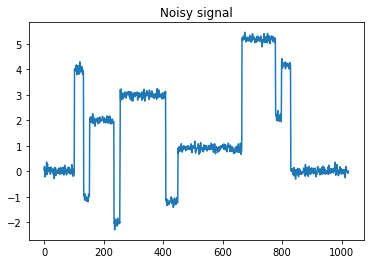

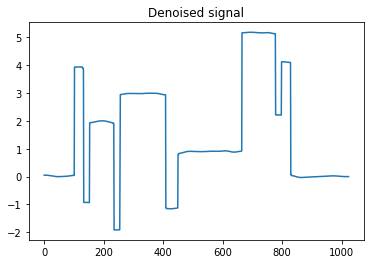

In [ ]:
# visualize denoised signal
plt.plot(x)
plt.title("Denoised signal")
plt.show()